In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'/Users/apple/Documents/Python/Elevoo Internship/Forest Cover Type Classification/Dataset/covtype.csv')

df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Checking If any Col contains Null values

In [4]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


Split the dataset into features (X) and target (y)

In [28]:
X = df.drop('Cover_Type',axis=1)
y = df['Cover_Type']

Cover_Type
2    189812
1    141933
3     23955
7     13742
6     11636
5      6360
4      1840
Name: count, dtype: int64


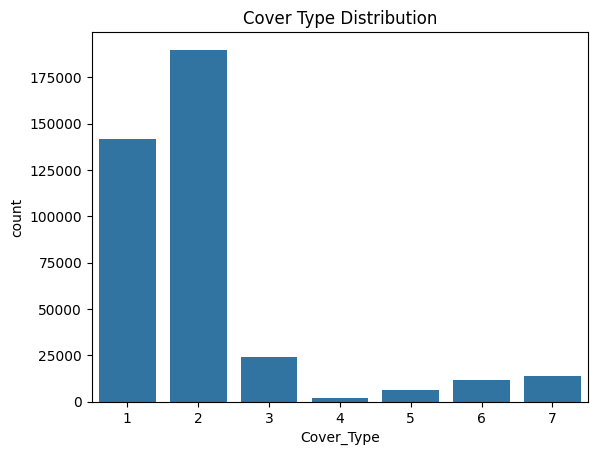

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y, random_state=42)

print(y_train.value_counts())

sns.countplot(x=y_train)
plt.title('Cover Type Distribution')
plt.show()

Handle Class Imbalance (SMOTE) : Balancing the count of both classes

In [7]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train,y_train)

print(y_train_res.value_counts())

Cover_Type
6    189812
1    189812
2    189812
7    189812
3    189812
4    189812
5    189812
Name: count, dtype: int64


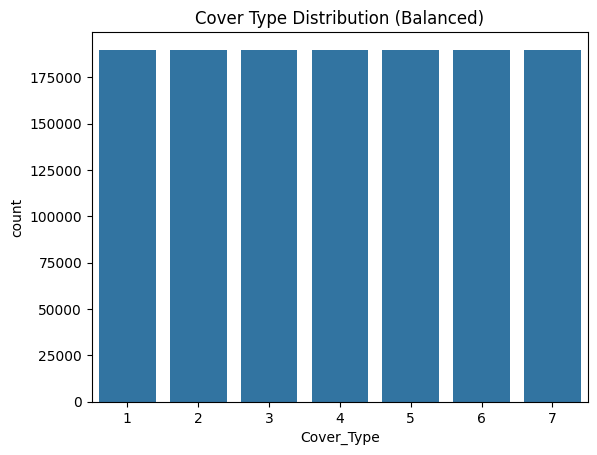

In [8]:
sns.countplot(x=y_train_res)
plt.title('Cover Type Distribution (Balanced)')
plt.show()

Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT = DecisionTreeClassifier()
DT.fit(X_train_res,y_train_res)

y_predict_DT = DT.predict(X_test)

print('Decision Tree Classifier Accuracy: ',accuracy_score(y_test,y_predict_DT))

Decision Tree Classifier Accuracy:  0.934508224936631


Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

RFC.fit(X_train_res,y_train_res)

y_predict_RFC = RFC.predict(X_test)


Random Forest Results
Accuracy Score:  0.9551827010337238
Classification Rreport
              precision    recall  f1-score   support

           1       0.96      0.95      0.95     69907
           2       0.96      0.96      0.96     93489
           3       0.94      0.96      0.95     11799
           4       0.88      0.90      0.89       907
           5       0.88      0.91      0.89      3133
           6       0.90      0.94      0.92      5731
           7       0.96      0.97      0.96      6768

    accuracy                           0.96    191734
   macro avg       0.92      0.94      0.93    191734
weighted avg       0.96      0.96      0.96    191734



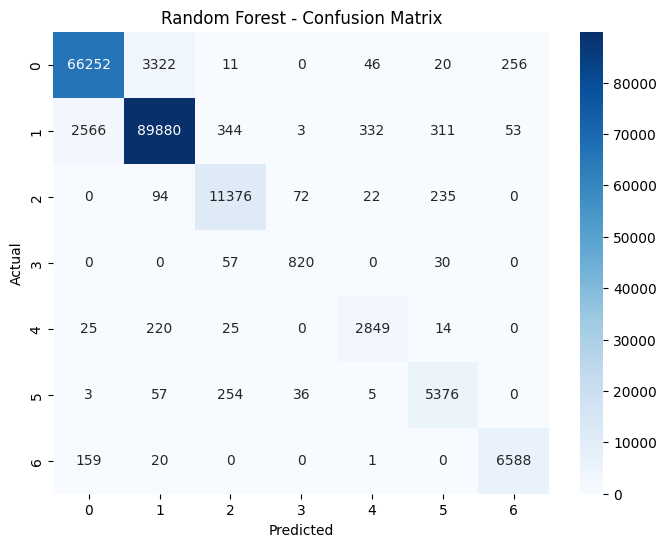

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print('Random Forest Results')
print('Accuracy Score: ',accuracy_score(y_test,y_predict_RFC))
print('Classification Rreport')
print(classification_report(y_test,y_predict_RFC))

# Confusion Matrix RF
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_predict_RFC), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGBoost

XGBoost Accuracy: 0.8380934002315709
              precision    recall  f1-score   support

           0       0.82      0.85      0.84     69907
           1       0.90      0.80      0.85     93489
           2       0.88      0.90      0.89     11799
           3       0.82      0.93      0.87       907
           4       0.42      0.94      0.58      3133
           5       0.71      0.92      0.80      5731
           6       0.79      0.98      0.88      6768

    accuracy                           0.84    191734
   macro avg       0.76      0.90      0.81    191734
weighted avg       0.85      0.84      0.84    191734



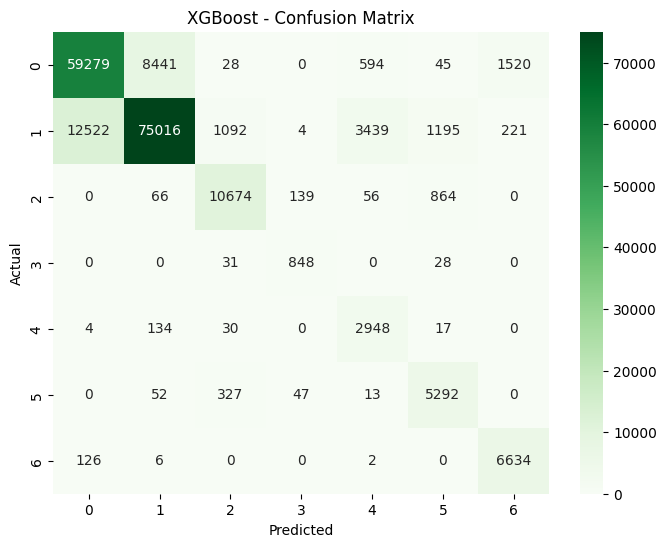

In [12]:
from xgboost import XGBClassifier
import numpy as np

y_train_res = y_train_res - 1  # if you are using SMOTE data
y_train = y_train - 1
y_test = y_test - 1


xgbc = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_train)),  # should be 7 now
    eval_metric="mlogloss",
    random_state=42
)

xgbc.fit(X_train_res,y_train_res)

y_predict_xgbc = xgbc.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_predict_xgbc))
print(classification_report(y_test, y_predict_xgbc))

# Confusion Matrix XGB
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_predict_xgbc), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Feature Importance Random Forest

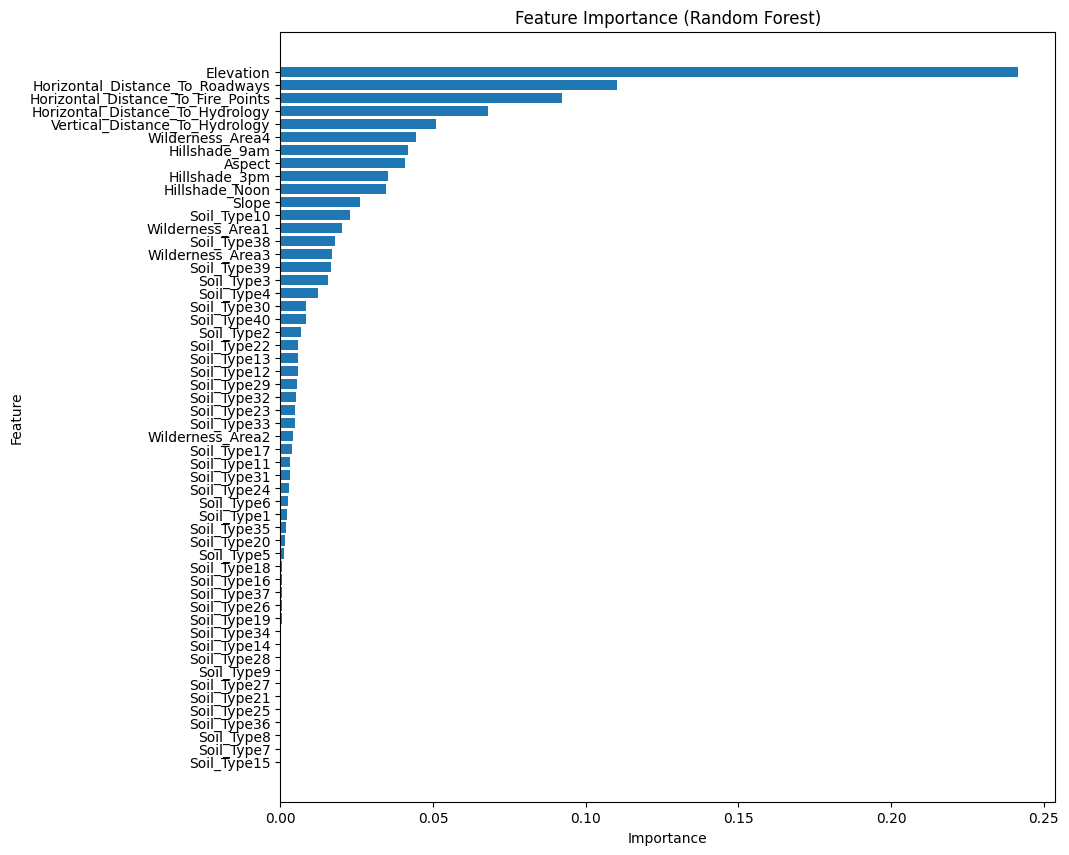

In [13]:
importances = RFC.feature_importances_  
feature_names = X_train.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()

Feature Importance XGBoost

<Figure size 1000x800 with 0 Axes>

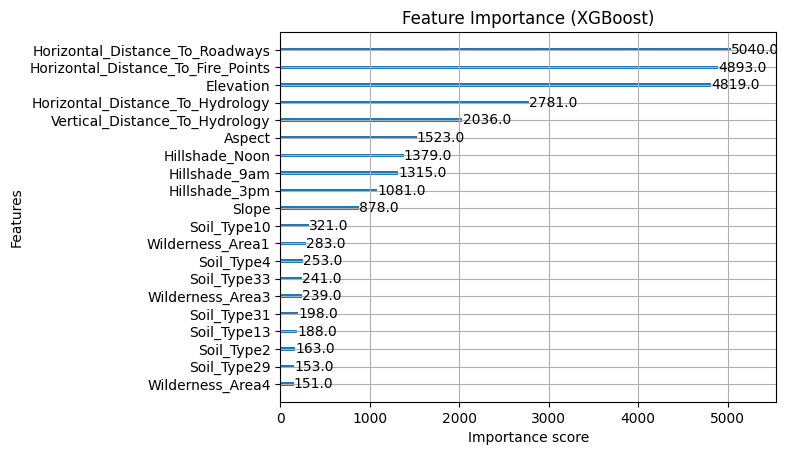

In [14]:
from xgboost import plot_importance

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 8))
plot_importance(xgbc, max_num_features=20, importance_type='weight')  
plt.title("Feature Importance (XGBoost)")
plt.show()

Compairing Random Forest & XGBoost

           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.955183   0.955357  0.955183  0.955225
1        XGBoost  0.838093   0.851239  0.838093  0.840904


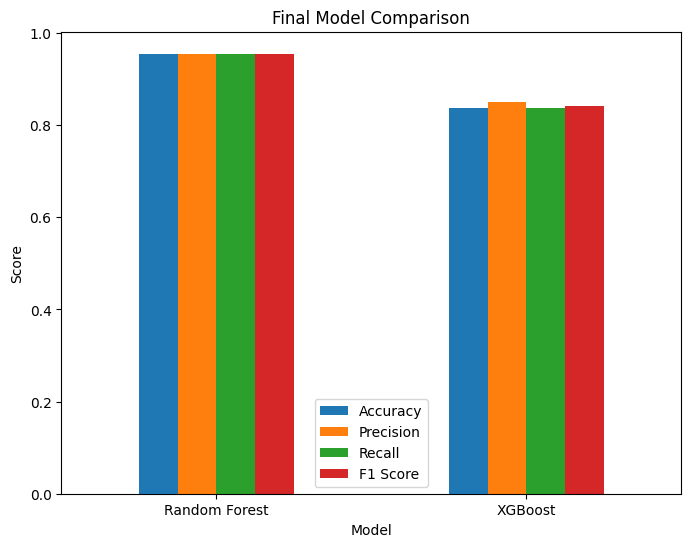

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

results = []

# Random Forest
results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test+1, y_predict_RFC),
    "Precision": precision_score(y_test+1, y_predict_RFC, average='weighted'),
    "Recall": recall_score(y_test+1, y_predict_RFC, average='weighted'),
    "F1 Score": f1_score(y_test+1, y_predict_RFC, average='weighted')
})

# XGBoost
results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_predict_xgbc),
    "Precision": precision_score(y_test, y_predict_xgbc, average='weighted'),
    "Recall": recall_score(y_test, y_predict_xgbc, average='weighted'),
    "F1 Score": f1_score(y_test, y_predict_xgbc, average='weighted')
})

comparison_df = pd.DataFrame(results)
print(comparison_df)

# Plot comparison
comparison_df.set_index("Model").plot(kind="bar", figsize=(8,6))
plt.title("Final Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


Exporting Model as Pickle File

In [32]:
import pickle as pk

with open('random_forest.pkl',"wb") as file:
    pk.dump(RFC,file)